In [1]:
import pandas as pd
merged_df = pd.read_csv('Mostmerged.csv',low_memory=False)

In summary:

"C100_4" - Completion rate within 100 percent of the expected time for 4-year institutions.
"C150_4" - Completion rate within 150 percent of the expected time for 4-year institutions.
"C200_4" - Completion rate within 200 percent of the expected time for 4-year instituions.


In [2]:
variables = ["C100_4","C150_4","C200_4" ]

for var in variables:
    missing_count = merged_df[var].isna().sum()
    total_count = len(merged_df)
    missing_prop = missing_count / total_count
    
    print(f"{var} - Missing Values: {missing_count}")
    print(f"{var} - Proportion of Missing Values: {missing_prop:.2%}")
    print()



C100_4 - Missing Values: 113329
C100_4 - Proportion of Missing Values: 72.65%

C150_4 - Missing Values: 106845
C150_4 - Proportion of Missing Values: 68.49%

C200_4 - Missing Values: 127493
C200_4 - Proportion of Missing Values: 81.73%



In [3]:
# Convert values to numeric and set errors='coerce' to turn non-numeric values to NaN
merged_df['C100_4'] = pd.to_numeric(merged_df['C100_4'], errors='coerce')
merged_df['C100_4'] = pd.to_numeric(merged_df['C150_4'], errors='coerce')
merged_df['C100_4'] = pd.to_numeric(merged_df['C200_4'], errors='coerce')


# Drop rows where any of the columns have NaN values
merged_df = merged_df.dropna(subset=['C100_4', 'C150_4','C200_4'])

# Print the shape of the resulting DataFrame
print(merged_df.shape)


(28322, 3215)


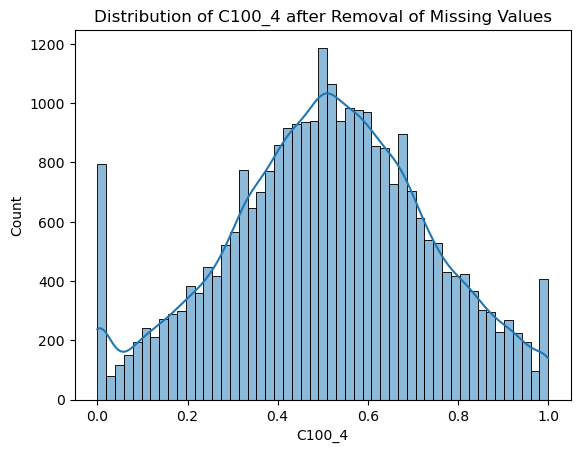

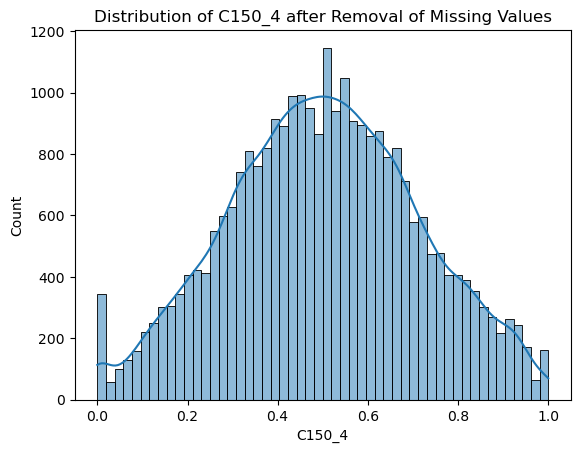

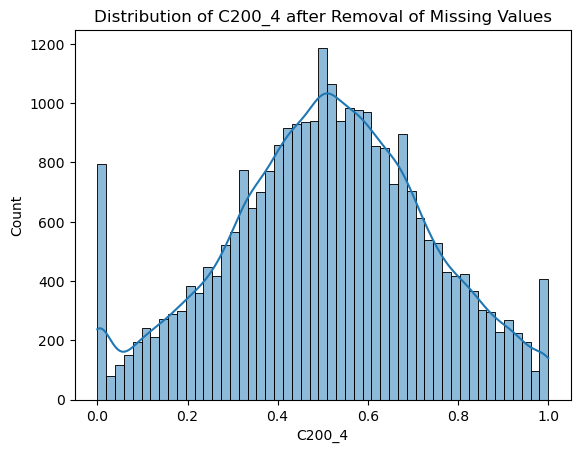

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of C100_4
sns.histplot(merged_df['C100_4'], kde=True)
plt.title("Distribution of C100_4 after Removal of Missing Values")
plt.show()

# Distribution of C150_4
sns.histplot(merged_df['C150_4'], kde=True)
plt.title("Distribution of C150_4 after Removal of Missing Values")
plt.show()

# Distribution of C200_4
sns.histplot(merged_df['C200_4'], kde=True)
plt.title("Distribution of C200_4 after Removal of Missing Values")
plt.show()


In [13]:
merged_df.to_csv('merged.csv', index=False)

In [18]:
cols = ['ADM_RATE_ALL','SAT_AVG_ALL','UGDS','UGDS_BLACK','UGDS_ASIAN','UG25ABV','IRPS_WHITE','IRPS_ASIAN','IRPS_BLACK','FTFTPCTFLOAN','FTFTPCTPELL','DEBT_MDN','PLUS_DEBT_INST_MD','PPTUG_EF','TUITFTE','INEXPFTE','AVGFACSAL','PCTPELL','COSTT4_A', 'COSTT4_P', 'NPT4_PUB', 'NPT4_PRIV', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITIONFEE_PROG','C100_4','C150_4','C200_4']


In [114]:
# Creating the new DataFrame
df = merged_df[cols]

In [115]:
df.columns

Index(['ADM_RATE_ALL', 'SAT_AVG_ALL', 'UGDS', 'UGDS_BLACK', 'UGDS_ASIAN',
       'UG25ABV', 'IRPS_WHITE', 'IRPS_ASIAN', 'IRPS_BLACK', 'FTFTPCTFLOAN',
       'FTFTPCTPELL', 'DEBT_MDN', 'PLUS_DEBT_INST_MD', 'PPTUG_EF', 'TUITFTE',
       'INEXPFTE', 'AVGFACSAL', 'PCTPELL', 'COSTT4_A', 'COSTT4_P', 'NPT4_PUB',
       'NPT4_PRIV', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITIONFEE_PROG',
       'C100_4', 'C150_4', 'C200_4'],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28322 entries, 54273 to 155433
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ADM_RATE_ALL       23634 non-null  float64
 1   SAT_AVG_ALL        18154 non-null  float64
 2   UGDS               28318 non-null  float64
 3   UGDS_BLACK         28318 non-null  float64
 4   UGDS_ASIAN         28318 non-null  float64
 5   UG25ABV            14038 non-null  float64
 6   IRPS_WHITE         19810 non-null  float64
 7   IRPS_ASIAN         19810 non-null  float64
 8   IRPS_BLACK         19810 non-null  float64
 9   FTFTPCTFLOAN       27956 non-null  float64
 10  FTFTPCTPELL        27956 non-null  float64
 11  DEBT_MDN           26140 non-null  object 
 12  PLUS_DEBT_INST_MD  13639 non-null  object 
 13  PPTUG_EF           28305 non-null  float64
 14  TUITFTE            28222 non-null  float64
 15  INEXPFTE           28222 non-null  float64
 16  AVGFACSAL        

In [117]:
df['DEBT_MDN'] = pd.to_numeric(df['DEBT_MDN'], errors='coerce')
df['PLUS_DEBT_INST_MD'] = pd.to_numeric(df['PLUS_DEBT_INST_MD'], errors='coerce')

C:\Users\KAKUT\AppData\Local\Temp\ipykernel_8820\3053779684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEBT_MDN'] = pd.to_numeric(df['DEBT_MDN'], errors='coerce')
C:\Users\KAKUT\AppData\Local\Temp\ipykernel_8820\3053779684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PLUS_DEBT_INST_MD'] = pd.to_numeric(df['PLUS_DEBT_INST_MD'], errors='coerce')


In [118]:
# Couting the number of empty values and zeros in each columns 
 # Counting the number of NaN values
columns = ['COSTT4_A', 'COSTT4_P', 'NPT4_PUB', 'NPT4_PRIV', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITIONFEE_PROG']

for column in columns:
    # Counting the number of NaN values
    num_empty = df[column].isna().sum()

    # Counting the number of zeros
    num_zeros = (df[column] == 0).sum()

    print(f"Column: {column}")
    print(f"Number of empty values: {num_empty}")
    print(f"Number of zeros: {num_zeros}")
    print("--------------")


Column: COSTT4_A
Number of empty values: 2654
Number of zeros: 0
--------------
Column: COSTT4_P
Number of empty values: 28252
Number of zeros: 0
--------------
Column: NPT4_PUB
Number of empty values: 20678
Number of zeros: 0
--------------
Column: NPT4_PRIV
Number of empty values: 10390
Number of zeros: 0
--------------
Column: TUITIONFEE_IN
Number of empty values: 376
Number of zeros: 25
--------------
Column: TUITIONFEE_OUT
Number of empty values: 376
Number of zeros: 25
--------------
Column: TUITIONFEE_PROG
Number of empty values: 28246
Number of zeros: 0
--------------


In [119]:
# Filling all the empty values with zeros to 
columns = ['COSTT4_A', 'COSTT4_P', 'NPT4_PUB', 'NPT4_PRIV', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITIONFEE_PROG']

for column in columns:
    df[column] = df[column].fillna(0)


C:\Users\KAKUT\AppData\Local\Temp\ipykernel_8820\1388797522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(0)


In [120]:
# Step 2: Combine desired columns with formatting
df['COST4'] = df['COSTT4_A'] + df['COSTT4_P']
df['NPT4']  = df['NPT4_PUB'] + df['NPT4_PRIV']
df['TUITIONFEE1_IN']  = df['TUITIONFEE_IN'] + df['TUITIONFEE_PROG']
df['TUITIONFEE1_OUT']  = df['TUITIONFEE_OUT'] + df['TUITIONFEE_PROG']

C:\Users\KAKUT\AppData\Local\Temp\ipykernel_8820\3806729617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COST4'] = df['COSTT4_A'] + df['COSTT4_P']
C:\Users\KAKUT\AppData\Local\Temp\ipykernel_8820\3806729617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NPT4']  = df['NPT4_PUB'] + df['NPT4_PRIV']
C:\Users\KAKUT\AppData\Local\Temp\ipykernel_8820\3806729617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [121]:
df = df.drop(columns=columns)

In [122]:
df.columns

Index(['ADM_RATE_ALL', 'SAT_AVG_ALL', 'UGDS', 'UGDS_BLACK', 'UGDS_ASIAN',
       'UG25ABV', 'IRPS_WHITE', 'IRPS_ASIAN', 'IRPS_BLACK', 'FTFTPCTFLOAN',
       'FTFTPCTPELL', 'DEBT_MDN', 'PLUS_DEBT_INST_MD', 'PPTUG_EF', 'TUITFTE',
       'INEXPFTE', 'AVGFACSAL', 'PCTPELL', 'C100_4', 'C150_4', 'C200_4',
       'COST4', 'NPT4', 'TUITIONFEE1_IN', 'TUITIONFEE1_OUT'],
      dtype='object')

In [123]:
df = df.dropna(how='any')


In [124]:
df.shape

(3673, 25)

In [125]:
# Create a list of non-target columns
non_target_cols = [col for col in df.columns if col not in ['C100_4', 'C150_4', 'C200_4']]

# Append target columns to the list
ordered_cols = non_target_cols + ['C100_4', 'C150_4', 'C200_4']

# Reorder the columns of the DataFrame
df = df[ordered_cols]


In [126]:
df.columns

Index(['ADM_RATE_ALL', 'SAT_AVG_ALL', 'UGDS', 'UGDS_BLACK', 'UGDS_ASIAN',
       'UG25ABV', 'IRPS_WHITE', 'IRPS_ASIAN', 'IRPS_BLACK', 'FTFTPCTFLOAN',
       'FTFTPCTPELL', 'DEBT_MDN', 'PLUS_DEBT_INST_MD', 'PPTUG_EF', 'TUITFTE',
       'INEXPFTE', 'AVGFACSAL', 'PCTPELL', 'COST4', 'NPT4', 'TUITIONFEE1_IN',
       'TUITIONFEE1_OUT', 'C100_4', 'C150_4', 'C200_4'],
      dtype='object')

In [127]:
# Reset the index so it starts from 1
df = df.reset_index(drop=True)
df.index += 1


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 1 to 3673
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ADM_RATE_ALL       3673 non-null   float64
 1   SAT_AVG_ALL        3673 non-null   float64
 2   UGDS               3673 non-null   float64
 3   UGDS_BLACK         3673 non-null   float64
 4   UGDS_ASIAN         3673 non-null   float64
 5   UG25ABV            3673 non-null   float64
 6   IRPS_WHITE         3673 non-null   float64
 7   IRPS_ASIAN         3673 non-null   float64
 8   IRPS_BLACK         3673 non-null   float64
 9   FTFTPCTFLOAN       3673 non-null   float64
 10  FTFTPCTPELL        3673 non-null   float64
 11  DEBT_MDN           3673 non-null   float64
 12  PLUS_DEBT_INST_MD  3673 non-null   float64
 13  PPTUG_EF           3673 non-null   float64
 14  TUITFTE            3673 non-null   float64
 15  INEXPFTE           3673 non-null   float64
 16  AVGFACSAL          3673 

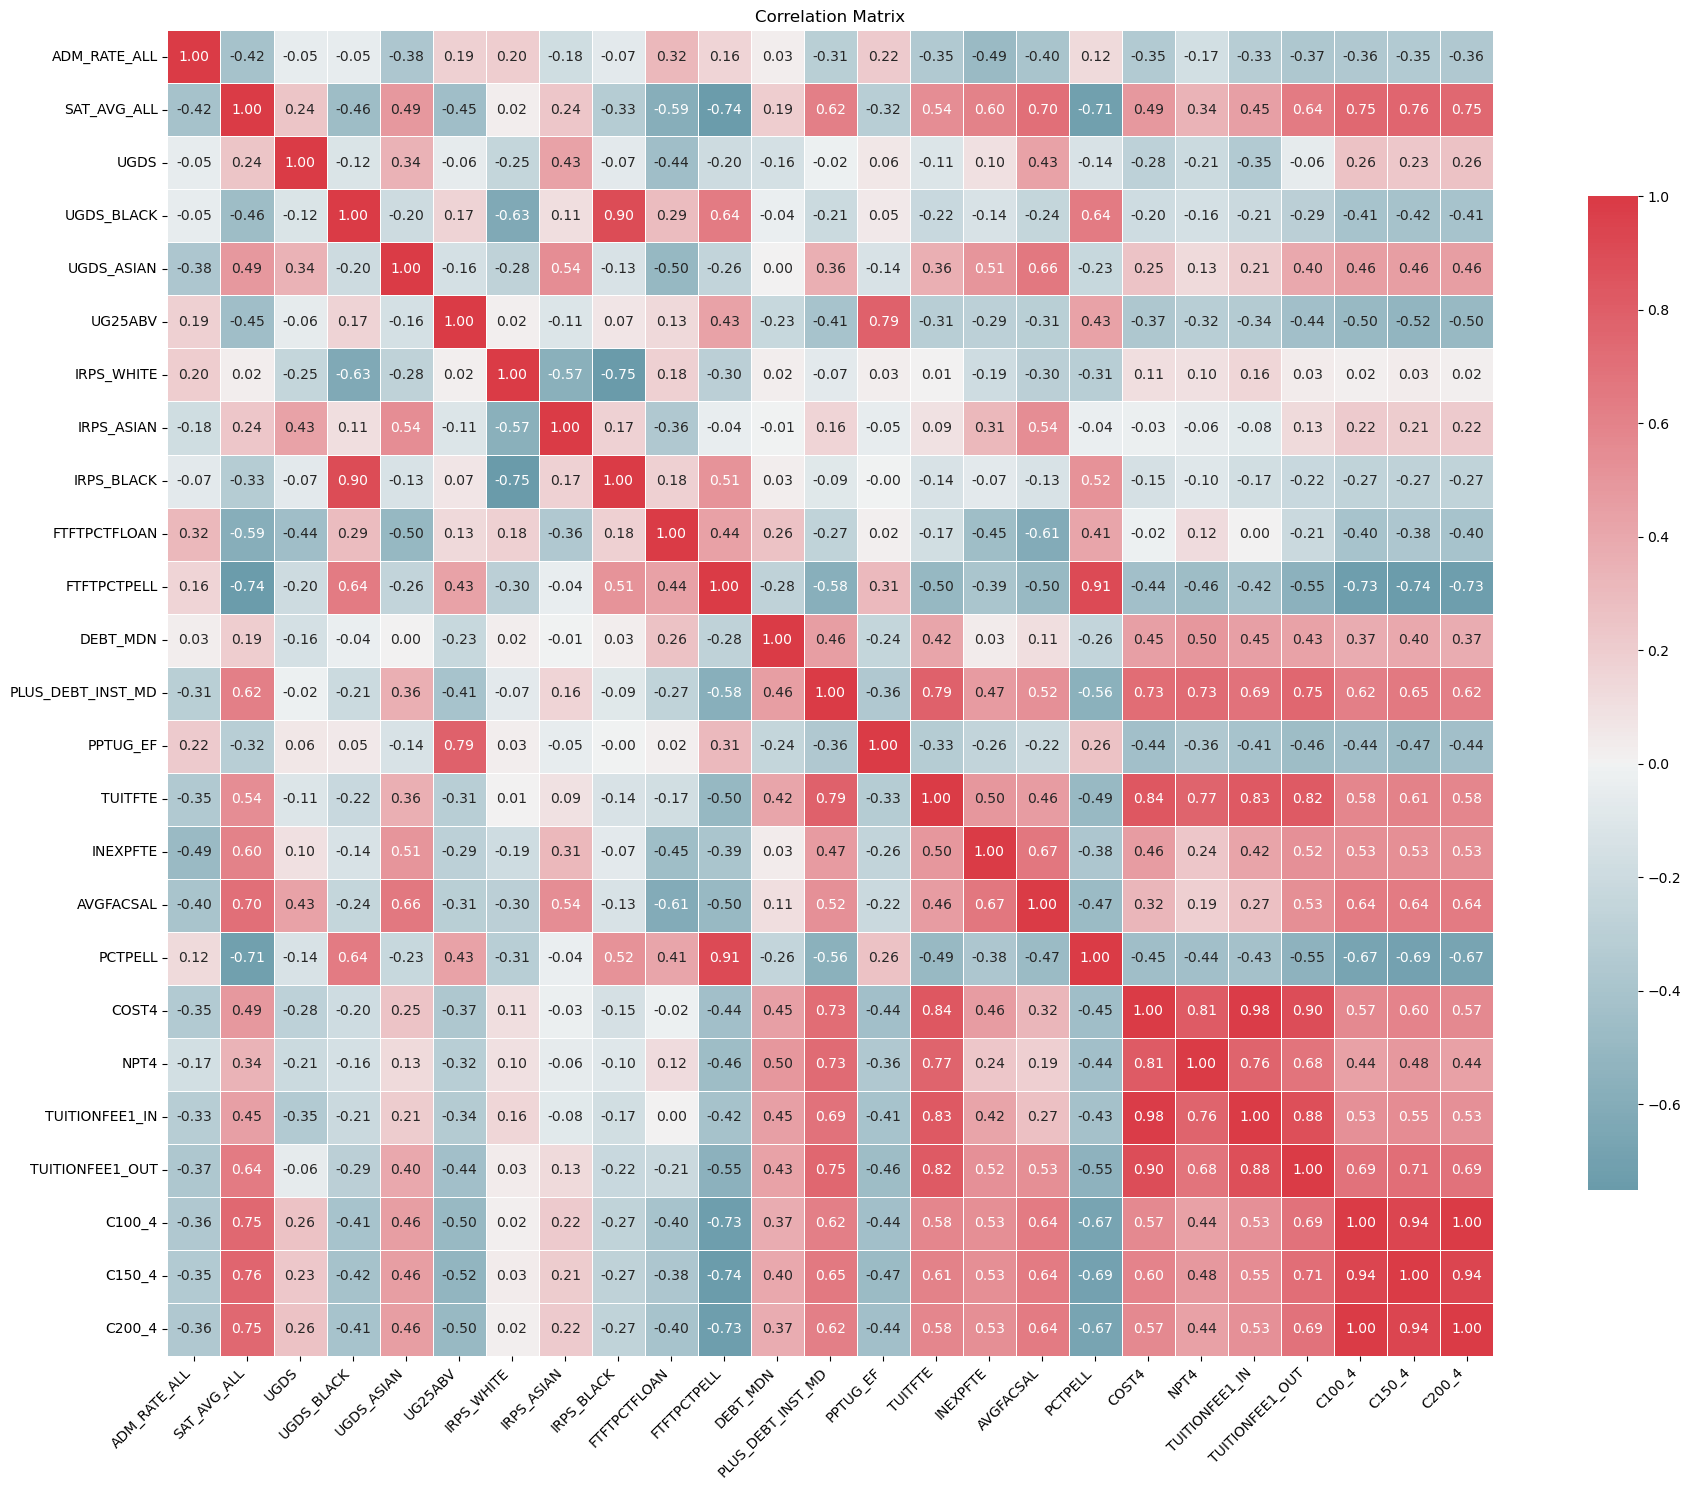

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))  # Increase size for better readability

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with annotations and correct aspect ratio
sns.heatmap(corr_matrix, cmap=cmap, center=0, annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.75}, square=True)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



In [139]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA


# Create feature matrix and target vector
X = df.drop(['C100_4', 'C150_4', 'C200_4'], axis=1)
y = df[['C100_4', 'C150_4', 'C200_4']]


# Train RandomForestRegressor and get feature importances
rf = RandomForestRegressor(n_estimators=150, random_state=12)
rf.fit(X, y)
feature_importances = rf.feature_importances_



# Print feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], feature_importances[indices[f]]))

1. FTFTPCTPELL (0.489644)
2. SAT_AVG_ALL (0.134555)
3. TUITIONFEE1_OUT (0.050522)
4. DEBT_MDN (0.032774)
5. UG25ABV (0.031669)
6. AVGFACSAL (0.023334)
7. UGDS (0.022687)
8. COST4 (0.021932)
9. ADM_RATE_ALL (0.021528)
10. UGDS_ASIAN (0.021096)
11. INEXPFTE (0.020762)
12. UGDS_BLACK (0.017441)
13. PCTPELL (0.017062)
14. PPTUG_EF (0.016145)
15. PLUS_DEBT_INST_MD (0.015841)
16. TUITIONFEE1_IN (0.010597)
17. TUITFTE (0.009815)
18. IRPS_BLACK (0.009058)
19. NPT4 (0.008838)
20. IRPS_WHITE (0.008786)
21. FTFTPCTFLOAN (0.008400)
22. IRPS_ASIAN (0.007516)


Based on the correlation matrix and feature important score below are the features I am considering to construct machine learning and deep learning models 

**FTFTPCTPELL (0.489644)**:
Description: Represents the percentage of full-time, first-time students awarded Pell Grants.
Interpretation: This is by far the most influential feature, suggesting that the rate at which students receive Pell Grants has a significant effect on completion rates. Pell Grants are awarded based on financial need, so this feature may be indicative of the socioeconomic status of students and its impact on completion rates.

**SAT_AVG_ALL (0.134555)**:
Description: Average SAT scores of all enrolled students.
Interpretation: Higher average SAT scores typically indicate a more academically prepared student body, which can influence completion rates. Institutions with higher SAT averages might have more rigorous admissions standards and attract students more likely to complete their degrees.

**TUITIONFEE1_OUT (0.050522)**:
Description: Out-of-state tuition fee.
Interpretation: The cost of attending an institution for out-of-state students might affect completion rates. Higher tuition fees might deter some students from completing their degrees, especially if they face financial hardships.

**DEBT_MDN (0.032774)**:
Description: Median debt of students.
Interpretation: The amount of debt students take on can influence their decision to continue or drop out. Higher median debt might indicate financial strains on students, potentially affecting completion rates.

**UG25ABV (0.031669)**:
Description: Percentage of undergraduates aged 25 and above.
Interpretation: Older students might have different life responsibilities (e.g., work, family) that can impact their ability to complete a degree within the expected time. This feature captures the proportion of such non-traditional students.

**AVGFACSAL (0.023334)**:
Description: Average faculty salary.
Interpretation: Institutions with higher faculty salaries might attract more qualified and experienced faculty, potentially leading to better academic support and thus influencing completion rates.

**UGDS (0.022687)**:
Description: Number of undergraduate students enrolled.
Interpretation: The size of the student body might affect the institution's resources, class sizes, and student-to-faculty ratios, which can all influence completion rates.

**COST4 (0.021932)**:
Description: Average cost for a 4-year program.
Interpretation: Similar to tuition fees, the overall cost of a 4-year program can impact a student's ability to complete the program, especially if they face financial challenges.

**ADM_RATE_ALL (0.021528)**:
Description: Overall admission rate.
Interpretation: Institutions with lower admission rates are more selective. The selectivity might correlate with student preparedness and resources available, influencing completion rates.

**UGDS_ASIAN (0.021096)**:
Description: Percentage of Asian undergraduate students.
Interpretation: This represents the diversity of the student body. Different demographics might have varying cultural, economic, or academic backgrounds that can impact completion rates.

In [140]:
top_10_features = [
    "FTFTPCTPELL",
    "SAT_AVG_ALL",
    "TUITIONFEE1_OUT",
    "DEBT_MDN",
    "UG25ABV",
    "AVGFACSAL",
    "UGDS",
    "COST4",
    "ADM_RATE_ALL",
    "UGDS_ASIAN"
]


In [141]:
df.to_csv('model.csv', index=False)